In [6]:
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('/Users/andreawei/Documents/Learnings/Python Project/Datasets/jobs_data_final.csv')
df['extensions'] = df['extensions'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
# Finding the strings in 'extensions' that are related to health insurance, WFH, and degree requirement (via further data cleaning)

df_xplode = df.explode('extensions')

items = df_xplode['extensions'].unique()

benefit_terms = []
for x in items:
    xl = str(x).lower()
    if 'health' in xl:
        benefit_terms.append(x)
    elif 'home' in xl:
        benefit_terms.append(x)
    elif 'degree' in xl:
        benefit_terms.append(x)

print(benefit_terms)

['Work from home', 'No degree mentioned', 'Health insurance']


In [8]:
# Adding to the dataframe boolean columns 'health_insurance', 'degree_required', and 'job_remote'

health_insurance = lambda x: True if 'Health insurance' in x else False
df['health_insurance'] = df['extensions'].apply(health_insurance)

degree_required = lambda x: False if 'No degree mentioned' in x else True
df['degree_required'] = df['extensions'].apply(degree_required)

remote = lambda x: True if 'Work from home' in x else False
df['job_remote'] = df['extensions'].apply(remote)

In [9]:
# Evaluating the numbers of True/False values in each boolean column

value_counts = df['job_remote'].value_counts()
de_req = df['degree_required'].value_counts()
health_ins = df['health_insurance'].value_counts()

print(value_counts)
print(de_req)
print(health_ins)

job_remote
True     16228
False    14802
Name: count, dtype: int64
degree_required
True     22353
False     8677
Name: count, dtype: int64
health_insurance
False    17633
True     13397
Name: count, dtype: int64


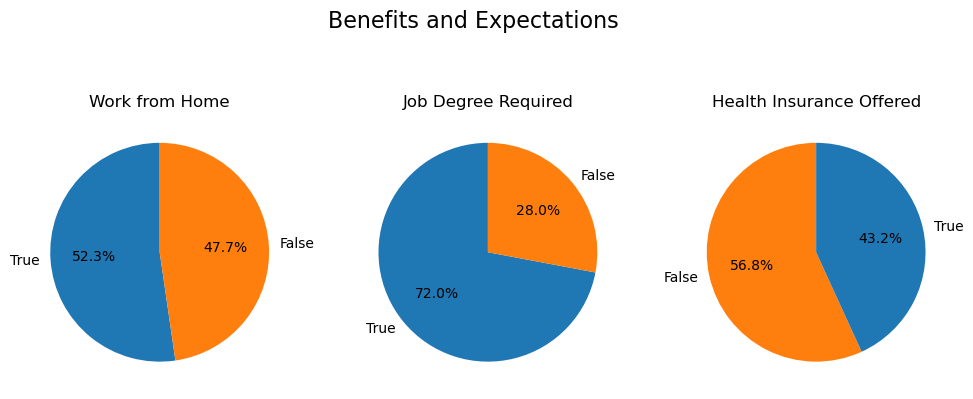

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle('Benefits and Expectations', fontsize=16)

color_map = {True: 'C0', False: 'C1'}

for i, (column, label_order, title) in enumerate([
        ('job_remote', [True, False], 'Work from Home'),
        ('degree_required', [True, False], 'Job Degree Required'),
        ('health_insurance', [False, True], 'Health Insurance Offered')
    ]):
    data_counts = df[column].value_counts()
    pies = [data_counts.get(label, 0) for label in label_order]
    labels = [str(label) for label in label_order]
    color_code = [color_map[label] for label in label_order]
    
    ax[i].pie(pies, labels=labels, autopct='%1.1f%%', startangle=90, colors=color_code)
    ax[i].set_title(title)

plt.show()
